## Exploratory Data Analysis (EDA)
The intent of this notebook is to explore the phonetic vowel statistics in English language

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing English Phonetic vowels statistic from Li Xie's paper

df = pd.read_csv(r'D:\University of Rochester\Fall24\RA - Florian\Code\Li_Xie_2020_L1_vowels_statistics_general.csv')
df.head()

,Talker,Vowel,Token,Trial,Duration,SR,Gender,F0_gm,F1_gm,F2_gm,F3_gm,height_gm,backness_gm
0,E1,aa1,1,7,0.258644,150.345349,male,111.331160,598.114317,1133.572357,2227.575804,1.380847,0.639347
1,E1,aa1,2,17,0.224653,150.345349,male,110.190060,554.648505,1226.774620,2326.718404,1.305400,0.793809
2,E1,aa1,3,27,0.233428,150.345349,male,112.078218,582.161551,1133.536933,2180.602647,1.353813,0.666350
3,E1,aa1,4,37,0.266485,150.345349,male,106.249087,618.666624,1163.534539,2223.333105,1.414632,0.631651
4,E1,aa1,5,47,0.238694,150.345349,male,107.904260,651.237090,1132.643892,2256.831653,1.465939,0.553436


We can see that our dataframe contains data of various talkers speaking different vowel sounds. There are a couple of observations we can make about the data straight off the bat:
1. We can see what are the formant frquenceies for each vowel sound and how it varies with talker's gender
2. There might exist some correlation between duration and vowel, which most likely will be the same for both the genders
3. We can test if there is any correlation between the formant frequencies and the height_gm, backness_gm
4. We can test the normalization theory as well, seeing if F3_gm is correlated with Gender of the talker (vocal tract length)?
5. We can test if F0_gm, F1_gm when scatter plotted before and after F3_gm normalization offers a better separability between the overlapping regions

____
We begin our analysis by basic summarization of the dataset we have

In [2]:

# Summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
             Token        Trial     Duration           SR        F0_gm  \
count  1243.000000  1243.000000  1243.000000  1243.000000  1241.000000   
mean      5.078842   454.151247     0.202229   157.377584   143.554898   
std       2.640005   310.842859     0.054721    13.898120    45.246962   
min       1.000000     1.000000     0.000830   143.986574    92.000000   
25%       3.000000   195.500000     0.163859   146.508161   111.550465   
50%       5.000000   389.000000     0.201836   152.199049   128.237224   
75%       7.000000   706.500000     0.240627   165.049823   162.251033   
max      11.000000  1094.000000     0.375314   192.209745   320.468151   

             F1_gm        F2_gm        F3_gm    height_gm  backness_gm  
count  1243.000000  1243.000000  1243.000000  1243.000000  1243.000000  
mean    557.460931  1652.393623  2687.339429     1.207244     1.110024  
std     188.653182   463.121522   322.620188     0.346318     0.487080  
min     244.286429  

Let us see if duration varies with gender and in general the distribution of duration

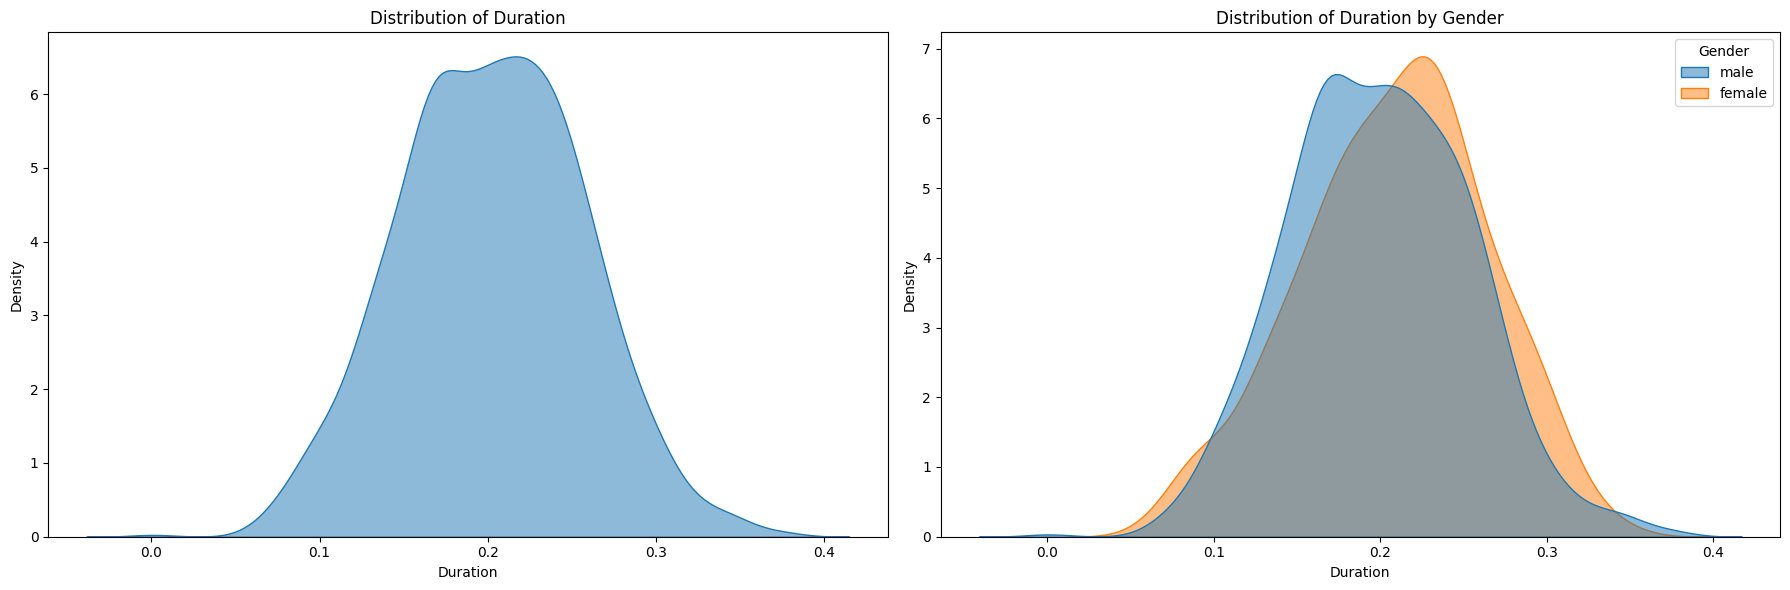

In [4]:
# Data Visualization
# Distribution of Duration
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# KDE plot without Gender hue
sns.kdeplot(data=df, x='Duration', fill=True, common_norm=False, alpha=0.5, ax=axes[0])
axes[0].set_title('Distribution of Duration')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Density')

# KDE plot with Gender hue
sns.kdeplot(data=df, x='Duration', hue='Gender', fill=True, common_norm=False, alpha=0.5, ax=axes[1])
axes[1].set_title('Distribution of Duration by Gender')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

Now we will test if durations varies for each vowel sound and if it varies with gender too

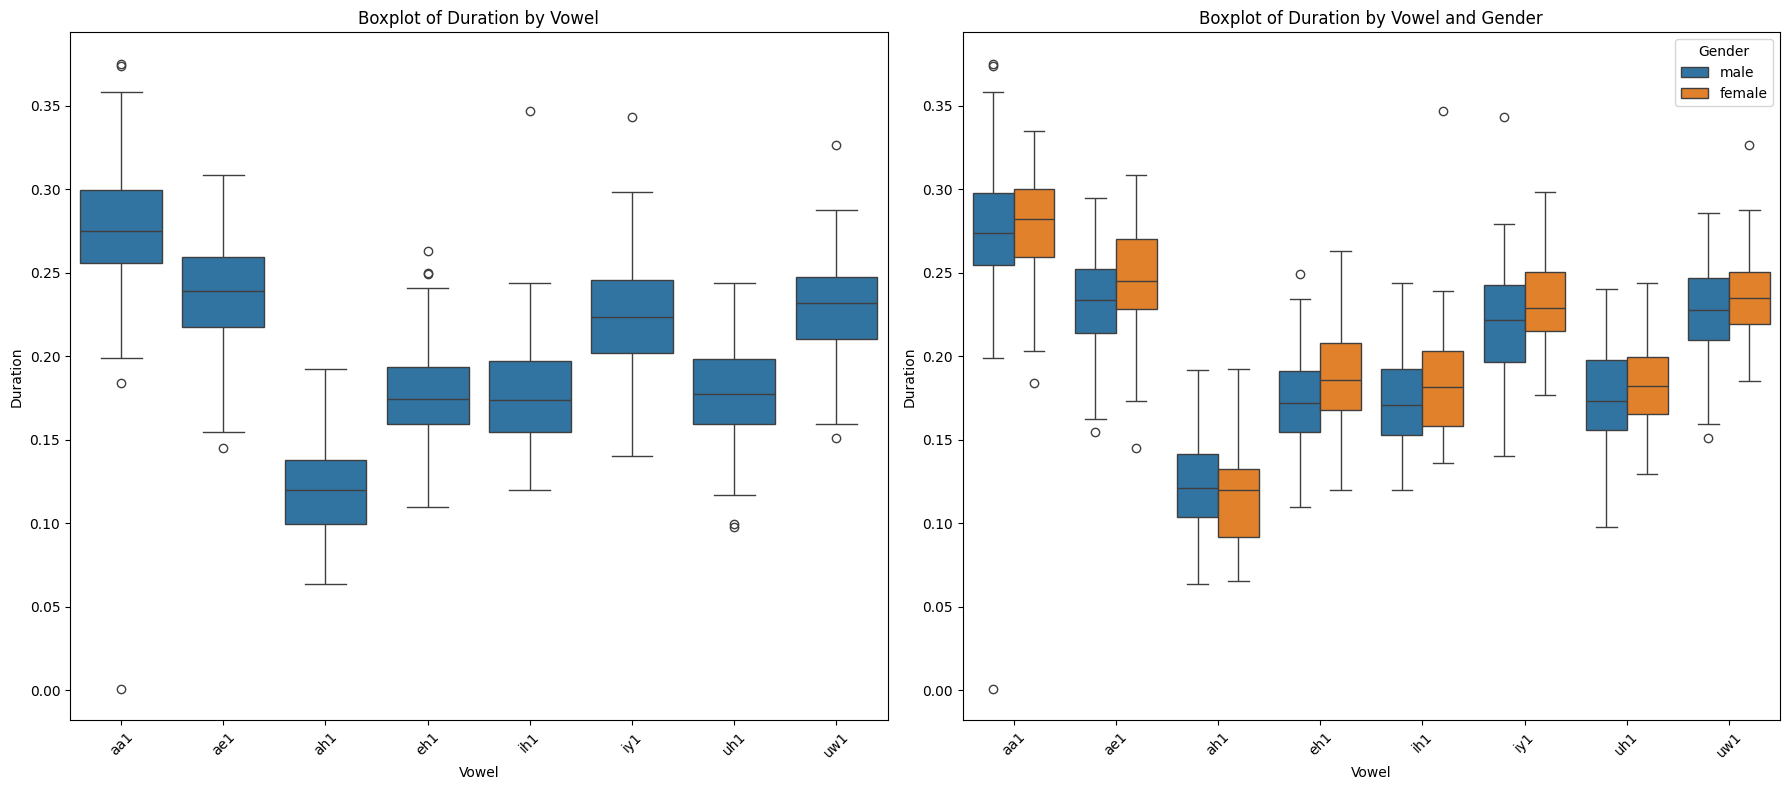

In [5]:
# Boxplot of Duration by Vowel
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot without Gender hue
sns.boxplot(x='Vowel', y='Duration', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Duration by Vowel')
axes[0].set_xlabel('Vowel')
axes[0].set_ylabel('Duration')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot with Gender hue
sns.boxplot(x='Vowel', y='Duration', data=df, hue='Gender', ax=axes[1])
axes[1].set_title('Boxplot of Duration by Vowel and Gender')
axes[1].set_xlabel('Vowel')
axes[1].set_ylabel('Duration')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Now we analyse the distribution of backness_gm and height_gm for each vowel and how and if it varies with the gender

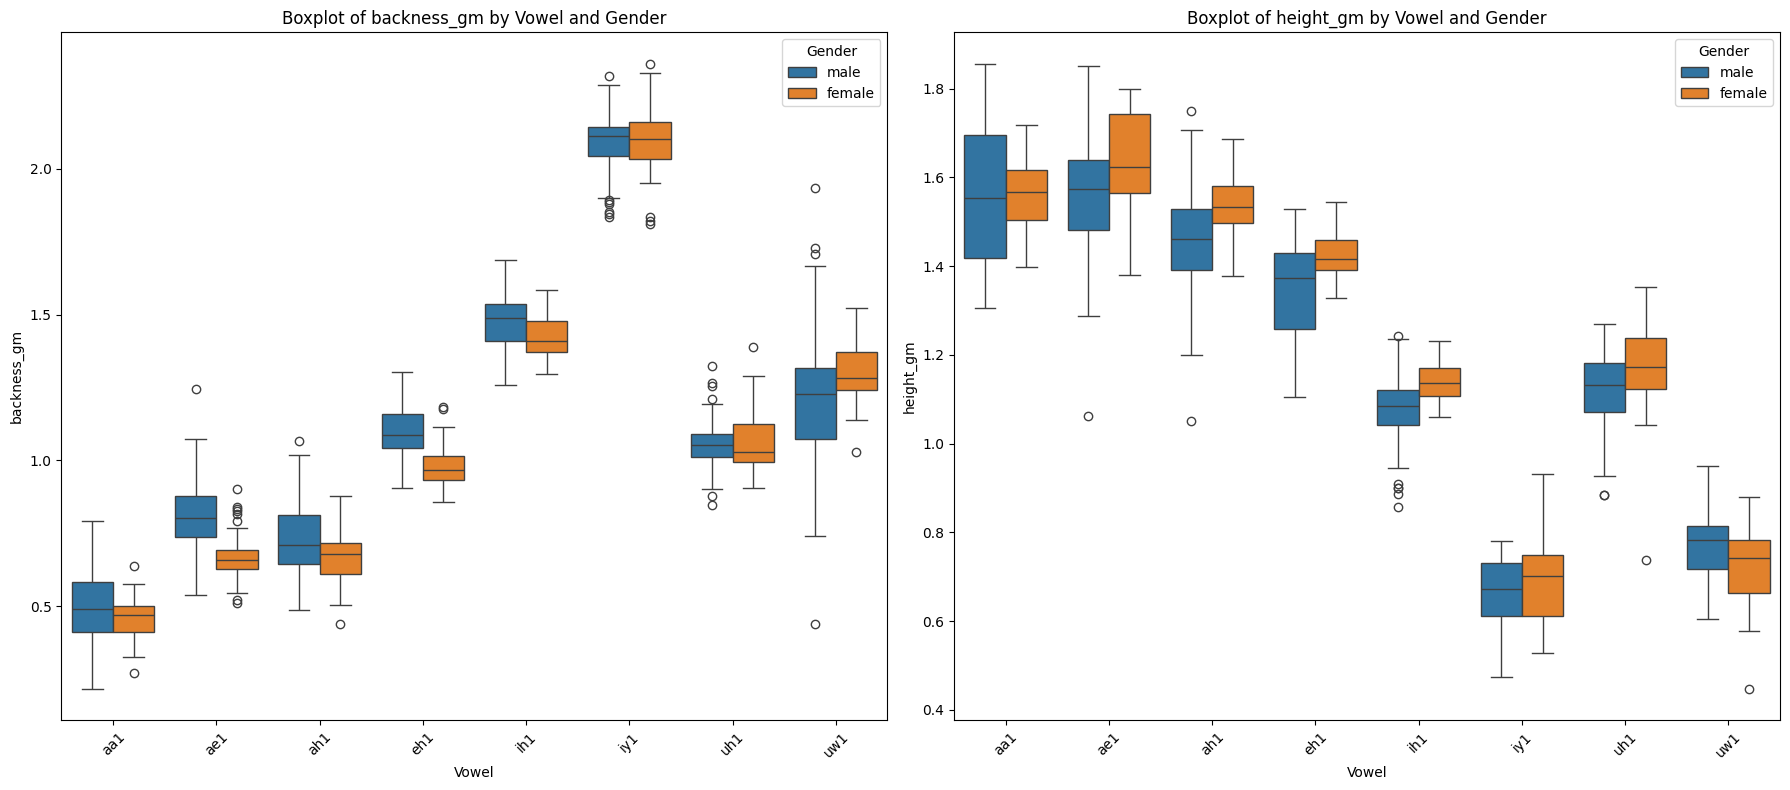

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# backness_gm by Vowel and Gender
sns.boxplot(x='Vowel', y='backness_gm', hue='Gender', data=df, ax=axes[0])
axes[0].set_title('Boxplot of backness_gm by Vowel and Gender')
axes[0].set_xlabel('Vowel')
axes[0].set_ylabel('backness_gm')
axes[0].tick_params(axis='x', rotation=45)

# height_gm by Vowel and Gender
sns.boxplot(x='Vowel', y='height_gm', hue='Gender', data=df, ax=axes[1])
axes[1].set_title('Boxplot of height_gm by Vowel and Gender')
axes[1].set_xlabel('Vowel')
axes[1].set_ylabel('height_gm')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



For my curiousity I also wanted to see whether the average backness_gm and height_gm are different for different vowels across talkers.

d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_km

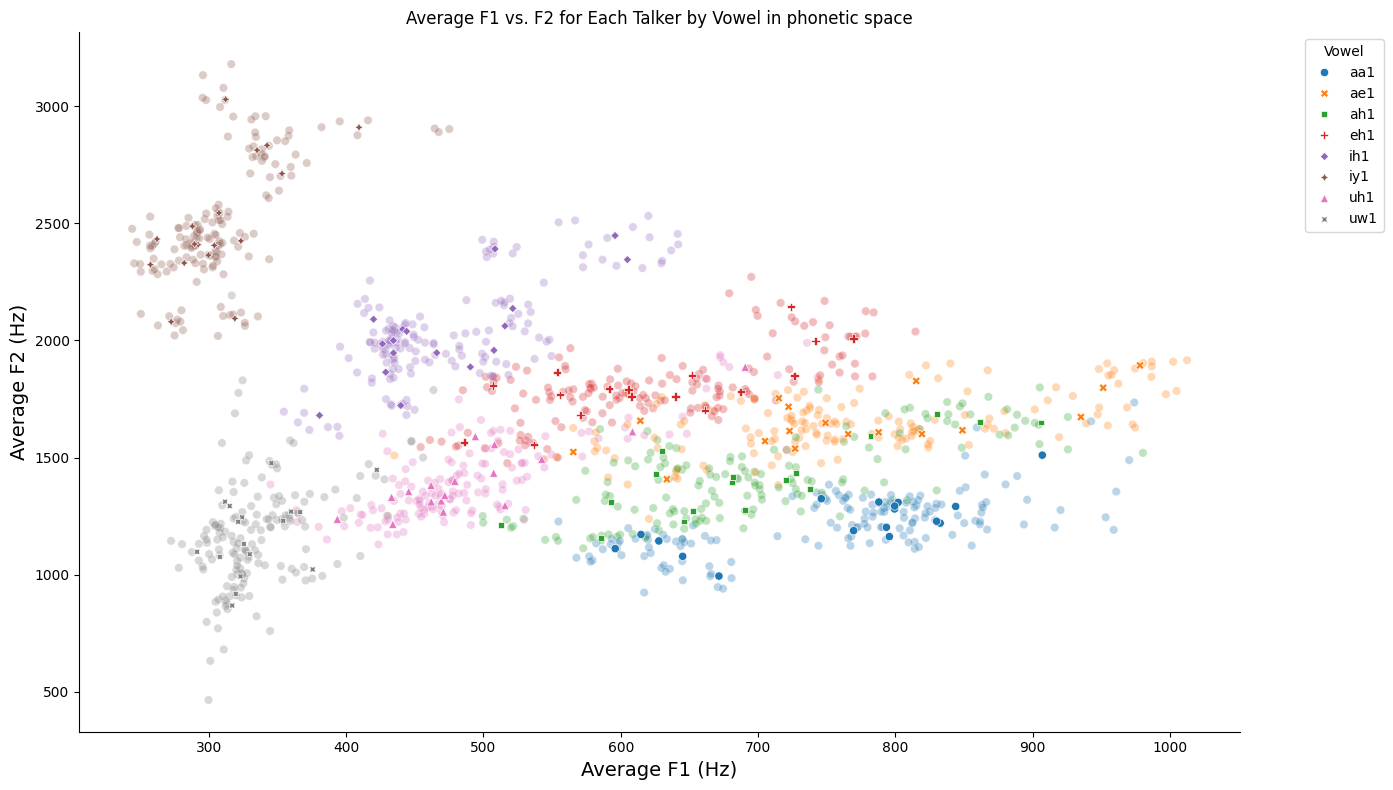

In [11]:
from sklearn.mixture import GaussianMixture

# # Calculate the average height_gm and backness_gm for each Talker and Vowel
# avg_df = df.groupby(['Talker', 'Vowel']).agg({'height_gm': 'mean', 'backness_gm': 'mean'}).reset_index()

# # Create a line plot
# plt.figure(figsize=(14, 8))
# sns.lineplot(data=avg_df, x='height_gm', y='backness_gm', hue='Vowel', style='Talker', markers=True, dashes=False)

# # Overlay scatter plot for clusters
# sns.scatterplot(data=avg_df, x='height_gm', y='backness_gm', hue='Vowel', style='Talker', markers=True, legend=False)

# # Fit Gaussian Mixture Models and plot contours
# vowels = avg_df['Vowel'].unique()
# colors = sns.color_palette(n_colors=len(vowels))

# for i, vowel in enumerate(vowels):
#     vowel_data = avg_df[avg_df['Vowel'] == vowel][['height_gm', 'backness_gm']]
#     gmm = GaussianMixture(n_components=1, covariance_type='full').fit(vowel_data)
#     mean = gmm.means_[0]
#     cov = gmm.covariances_[0]

#     # Create grid for contour plot
#     x, y = np.meshgrid(np.linspace(vowel_data['height_gm'].min(), vowel_data['height_gm'].max(), 100),
#                        np.linspace(vowel_data['backness_gm'].min(), vowel_data['backness_gm'].max(), 100))
#     xy = np.column_stack([x.flat, y.flat])
#     z = np.exp(gmm.score_samples(xy)).reshape(x.shape)

#     # Plot contour
#     plt.contour(x, y, z, levels=5, colors=[colors[i]], alpha=0.5)

# plt.title('Average height_gm vs. backness_gm for Each Talker by Vowel with GMM Contours')
# plt.xlabel('Average height_gm')
# plt.ylabel('Average backness_gm')

# # Place the legend outside the plot area
# plt.legend(title='Vowel', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# Calculate the average height_gm and backness_gm for each Talker and Vowel
avg_df = df.groupby(['Talker', 'Vowel']).agg({'F1_gm': 'mean', 'F2_gm': 'mean'}).reset_index()

# Create a scatter plot for vowel tokens
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='F1_gm', y='F2_gm', hue='Vowel', alpha=0.3, legend=False)

# Fit Gaussian Mixture Models and plot contours
vowels = avg_df['Vowel'].unique()
colors = sns.color_palette(n_colors=len(vowels))

for i, vowel in enumerate(vowels):
    vowel_data = avg_df[avg_df['Vowel'] == vowel][['F1_gm', 'F2_gm']]
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(vowel_data)
    mean = gmm.means_[0]
    cov = gmm.covariances_[0]

    # Create grid for contour plot
    x, y = np.meshgrid(np.linspace(vowel_data['F1_gm'].min(), vowel_data['F1_gm'].max(), 100),
                       np.linspace(vowel_data['F2_gm'].min(), vowel_data['F2_gm'].max(), 100))
    xy = np.column_stack([x.flat, y.flat])
    z = np.exp(gmm.score_samples(xy)).reshape(x.shape)

    # Plot contour
    plt.contour(x, y, z, levels=[0.05], colors=[colors[i]], alpha=0.5)

# Overlay scatter plot for speaker means
sns.scatterplot(data=avg_df, x='F1_gm', y='F2_gm', hue='Vowel', style='Vowel', markers=True, legend=True)

plt.title('Average F1 vs. F2 for Each Talker by Vowel in phonetic space')
plt.xlabel('Average F1 (Hz)', fontsize=14)
plt.ylabel('Average F2 (Hz)', fontsize=14)

# Simplify legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Vowel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove box around plot
sns.despine()

# Make axis labels larger
plt.xlabel('Average F1 (Hz)', fontsize=14)
plt.ylabel('Average F2 (Hz)', fontsize=14)

plt.tight_layout()
plt.show()

Now let us see if F3_gm is significantly different for each gender?

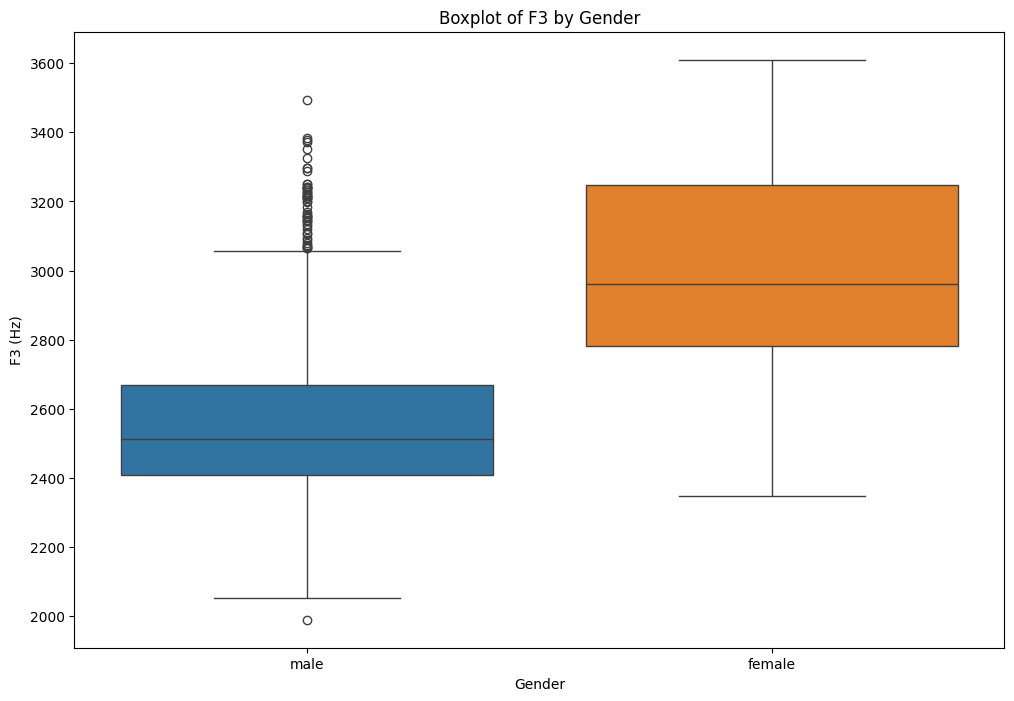

In [16]:
# Create a boxplot for F3_gm by Gender
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='F3_gm', hue='Gender',data=df)
plt.title('Boxplot of F3 by Gender')
plt.xlabel('Gender')
plt.ylabel('F3 (Hz)')
plt.show()

We saw that height_gm and backness_gm can be used to cluster different vowels but we wish to see how they are correlated with different formant frquencies and if the correlation varies with gender too

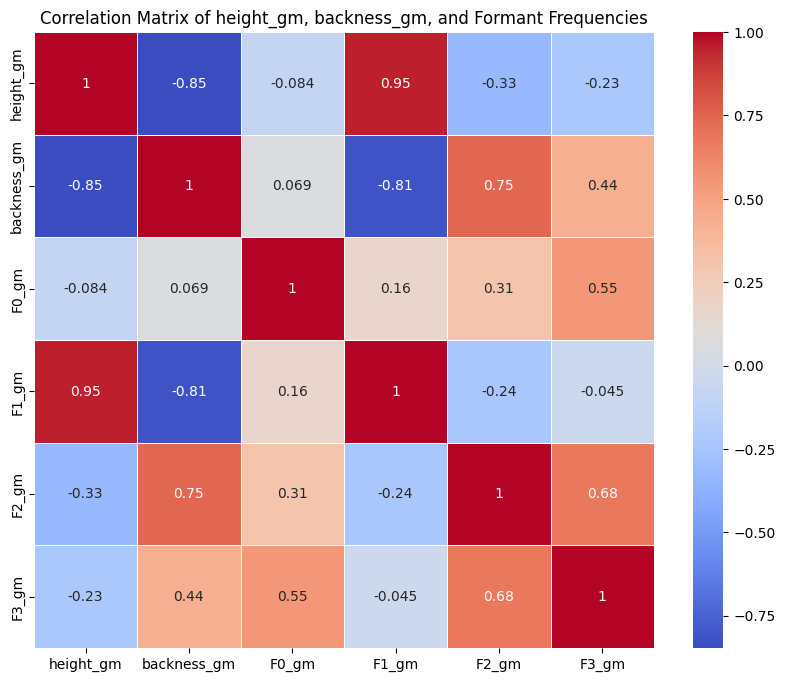

In [16]:

# Correlation analysis
correlation_features = ['height_gm', 'backness_gm', 'F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of height_gm, backness_gm, and Formant Frequencies')
plt.show()


In [17]:

# Detailed correlation analysis for height_gm and backness_gm with formant frequencies
height_corr = correlation_matrix.loc['height_gm', ['F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']]
backness_corr = correlation_matrix.loc['backness_gm', ['F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']]

print("Correlation of height_gm with formant frequencies:")
print(height_corr)

print("\nCorrelation of backness_gm with formant frequencies:")
print(backness_corr)

Correlation of height_gm with formant frequencies:
F0_gm   -0.083874
F1_gm    0.951692
F2_gm   -0.327026
F3_gm   -0.225604
Name: height_gm, dtype: float64

Correlation of backness_gm with formant frequencies:
F0_gm    0.068811
F1_gm   -0.813390
F2_gm    0.745476
F3_gm    0.435657
Name: backness_gm, dtype: float64


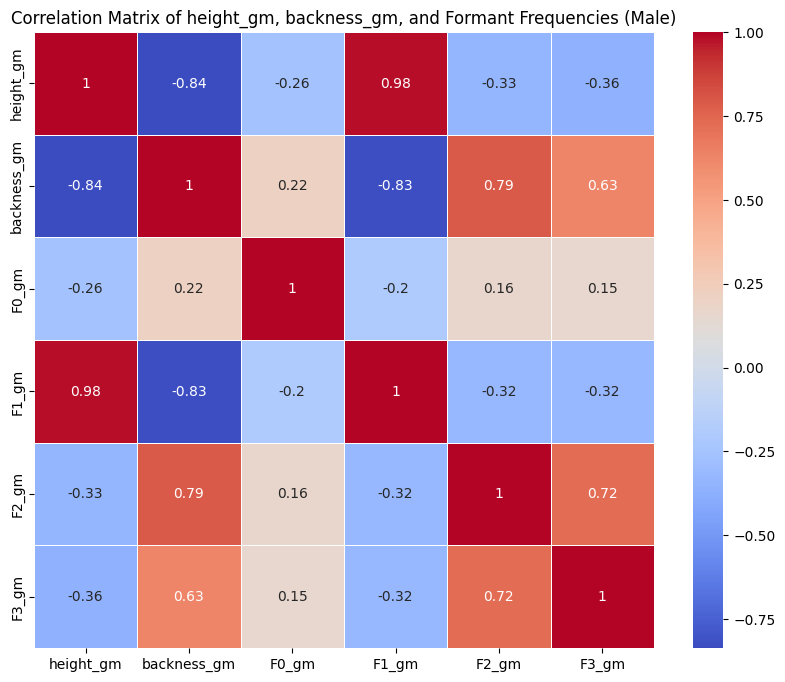

Correlation of height_gm with formant frequencies (Male):
F0_gm   -0.258628
F1_gm    0.984949
F2_gm   -0.334373
F3_gm   -0.357188
Name: height_gm, dtype: float64

Correlation of backness_gm with formant frequencies (Male):
F0_gm    0.215770
F1_gm   -0.827854
F2_gm    0.788736
F3_gm    0.628517
Name: backness_gm, dtype: float64


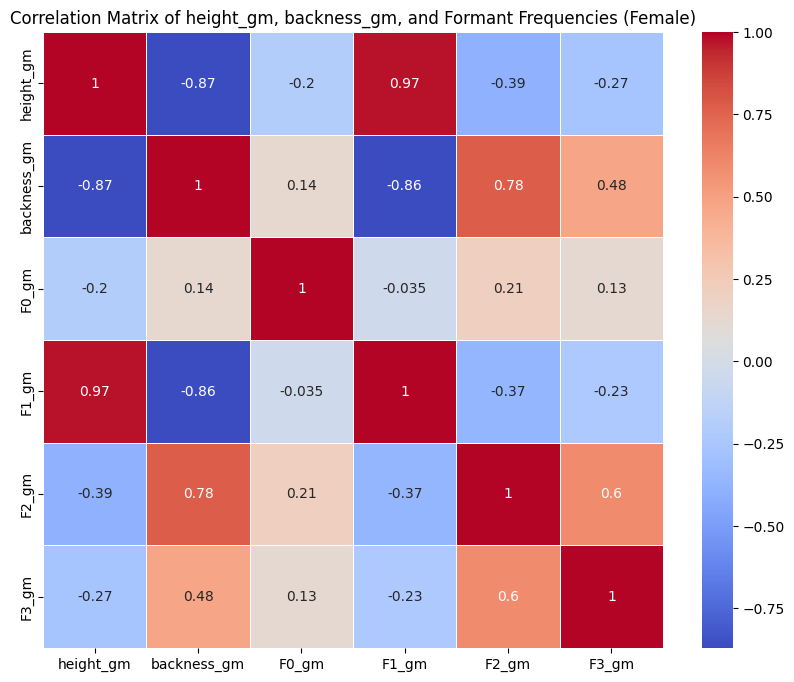


Correlation of height_gm with formant frequencies (Female):
F0_gm   -0.198729
F1_gm    0.972820
F2_gm   -0.393026
F3_gm   -0.266900
Name: height_gm, dtype: float64

Correlation of backness_gm with formant frequencies (Female):
F0_gm    0.136099
F1_gm   -0.864720
F2_gm    0.776090
F3_gm    0.478894
Name: backness_gm, dtype: float64


In [19]:
# Map gender to a more descriptive label
df['Gender_Label'] = df['Gender'].apply(lambda x: 'Male' if x == 'male' else 'Female')

# Define the features for correlation analysis
correlation_features = ['height_gm', 'backness_gm', 'F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']

# Separate data by gender
df_male = df[df['Gender_Label'] == 'Male']
df_female = df[df['Gender_Label'] == 'Female']

# Correlation matrix for males
correlation_matrix_male = df_male[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_male, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of height_gm, backness_gm, and Formant Frequencies (Male)')
plt.show()

# Detailed correlation analysis for height_gm and backness_gm with formant frequencies (Male)
height_corr_male = correlation_matrix_male.loc['height_gm', ['F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']]
backness_corr_male = correlation_matrix_male.loc['backness_gm', ['F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']]

print("Correlation of height_gm with formant frequencies (Male):")
print(height_corr_male)

print("\nCorrelation of backness_gm with formant frequencies (Male):")
print(backness_corr_male)

# Correlation matrix for females
correlation_matrix_female = df_female[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_female, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of height_gm, backness_gm, and Formant Frequencies (Female)')
plt.show()

# Detailed correlation analysis for height_gm and backness_gm with formant frequencies (Female)
height_corr_female = correlation_matrix_female.loc['height_gm', ['F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']]
backness_corr_female = correlation_matrix_female.loc['backness_gm', ['F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']]

print("\nCorrelation of height_gm with formant frequencies (Female):")
print(height_corr_female)

print("\nCorrelation of backness_gm with formant frequencies (Female):")
print(backness_corr_female)

The correlation doesn't vary with gender, however a point worth noting is that F1_gm is highly correlated with height_gm and F2_gm is highly correlated with backness_gm of the talker, something which we expect from the literature. It is really fascinating to see that!

Now we will test our normalization theory, see if there is a difference in separability after F3_gm normalization. First let us plot the average F1_gm and F2_gm for different talkers and try to find clusters using GMM.

d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_km

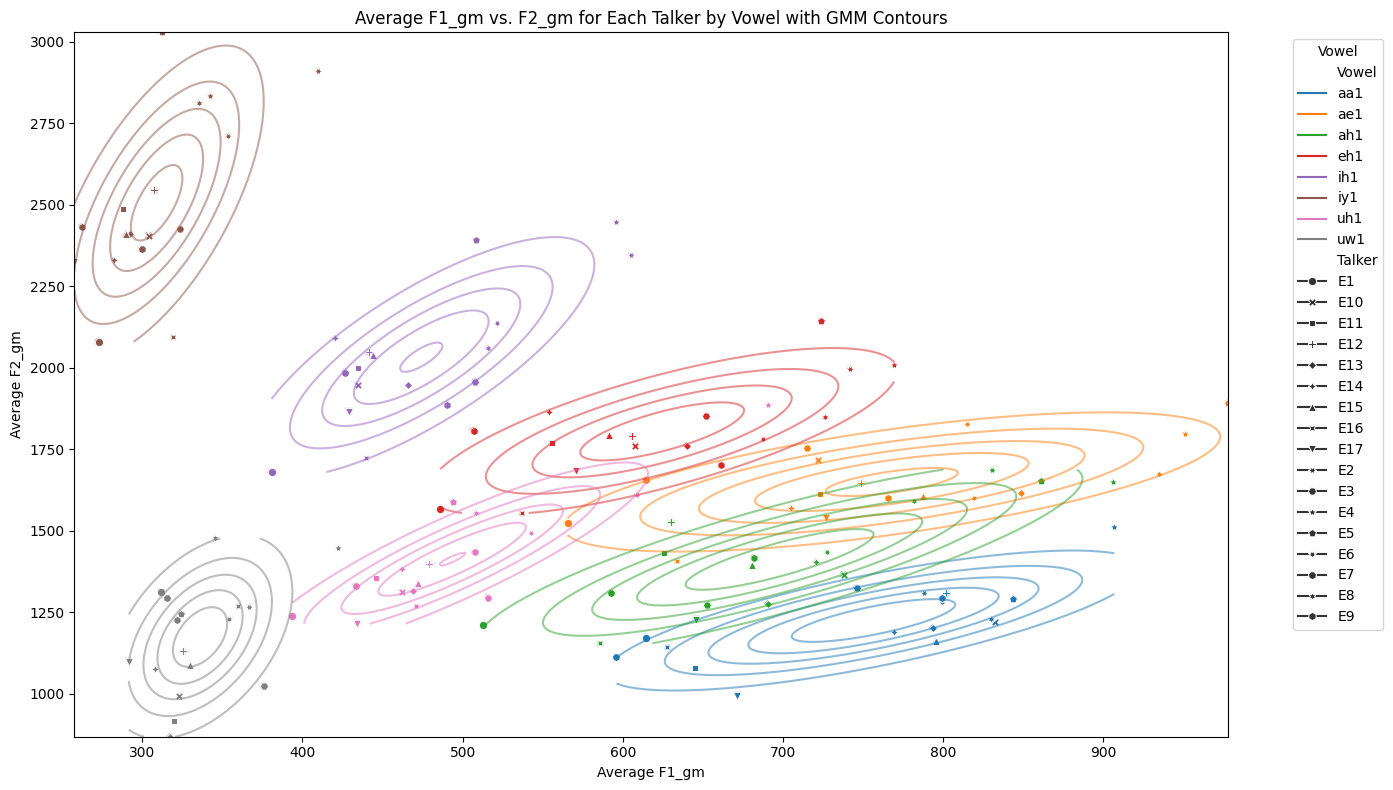

In [13]:
# Calculate the average F1_gm and F2_gm for each Talker and Vowel
avg_df = df.groupby(['Talker', 'Vowel']).agg({'F1_gm': 'mean', 'F2_gm': 'mean'}).reset_index()

# Create a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_df, x='F1_gm', y='F2_gm', hue='Vowel', style='Talker', markers=True, dashes=False)

# Overlay scatter plot for clusters
sns.scatterplot(data=avg_df, x='F1_gm', y='F2_gm', hue='Vowel', style='Talker', markers=True, legend=False)

# Fit Gaussian Mixture Models and plot contours
vowels = avg_df['Vowel'].unique()
colors = sns.color_palette(n_colors=len(vowels))

for i, vowel in enumerate(vowels):
    vowel_data = avg_df[avg_df['Vowel'] == vowel][['F1_gm', 'F2_gm']]
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(vowel_data)
    mean = gmm.means_[0]
    cov = gmm.covariances_[0]

    # Create grid for contour plot
    x, y = np.meshgrid(np.linspace(vowel_data['F1_gm'].min(), vowel_data['F1_gm'].max(), 100),
                       np.linspace(vowel_data['F2_gm'].min(), vowel_data['F2_gm'].max(), 100))
    xy = np.column_stack([x.flat, y.flat])
    z = np.exp(gmm.score_samples(xy)).reshape(x.shape)

    # Plot contour
    plt.contour(x, y, z, levels=5, colors=[colors[i]], alpha=0.5)

plt.title('Average F1_gm vs. F2_gm for Each Talker by Vowel with GMM Contours')
plt.xlabel('Average F1_gm')
plt.ylabel('Average F2_gm')

# Place the legend outside the plot area
plt.legend(title='Vowel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

We can see that there is a lot of overlap, now lets make normalized F1_gm and F2_gm and plot the same plot again with normalized values.

d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\ra_bcgs\Lib\site-packages\sklearn\cluster\_km

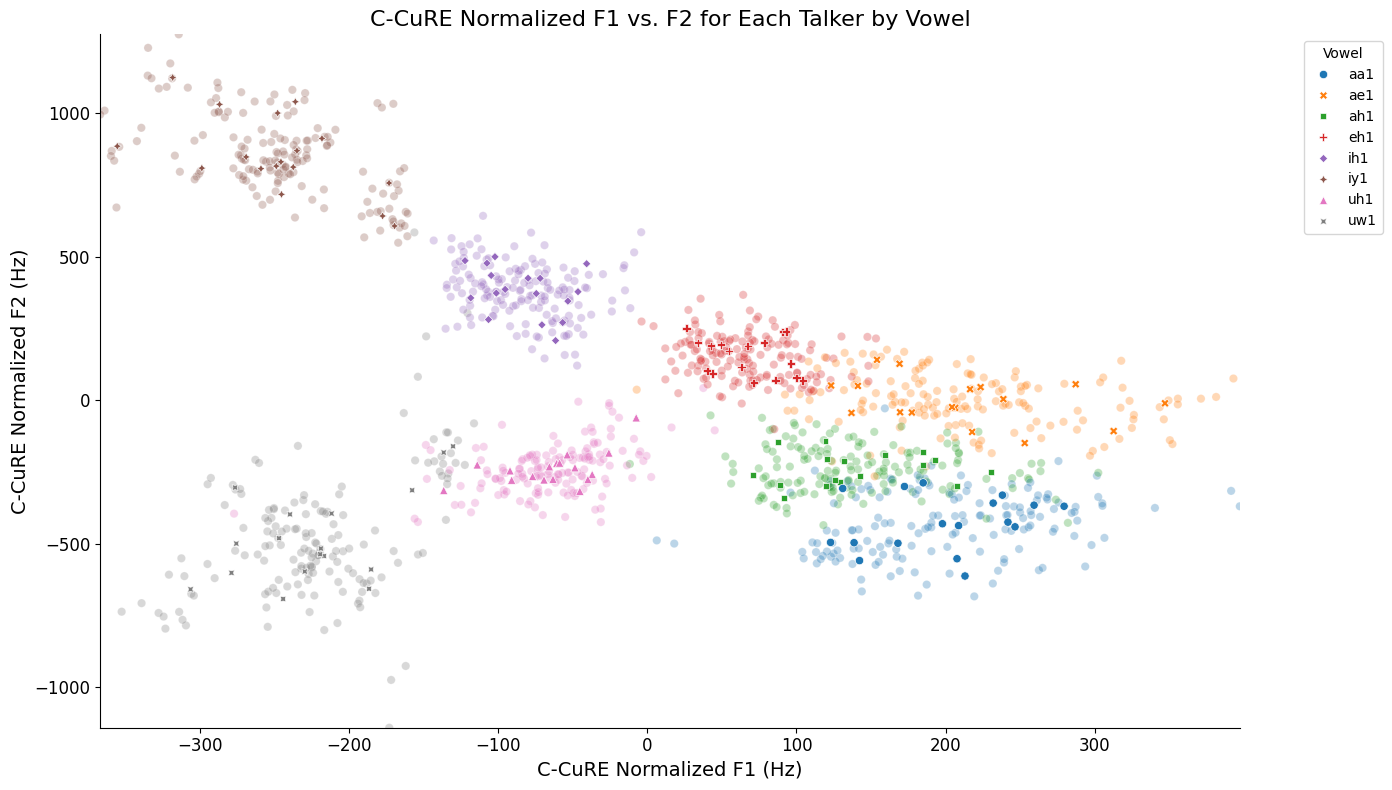

In [4]:
# Perform C-CuRE normalization (example normalization, adjust as needed)
import seaborn as sns
from sklearn.mixture import GaussianMixture
df['F1_CCuRE'] = df.groupby('Talker')['F1_gm'].transform(lambda x: x - x.mean())
df['F2_CCuRE'] = df.groupby('Talker')['F2_gm'].transform(lambda x: x - x.mean())

# Create a scatter plot for vowel tokens
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='F1_CCuRE', y='F2_CCuRE', hue='Vowel', alpha=0.3, legend=False)

# Fit Gaussian Mixture Models and plot contours
vowels = df['Vowel'].unique()
colors = sns.color_palette(n_colors=len(vowels))

for i, vowel in enumerate(vowels):
    vowel_data = df[df['Vowel'] == vowel][['F1_CCuRE', 'F2_CCuRE']]
    gmm = GaussianMixture(n_components=1, covariance_type='full').fit(vowel_data)
    mean = gmm.means_[0]
    cov = gmm.covariances_[0]

    # Create grid for contour plot
    x, y = np.meshgrid(np.linspace(vowel_data['F1_CCuRE'].min(), vowel_data['F1_CCuRE'].max(), 100),
                       np.linspace(vowel_data['F2_CCuRE'].min(), vowel_data['F2_CCuRE'].max(), 100))
    xy = np.column_stack([x.flat, y.flat])
    z = np.exp(gmm.score_samples(xy)).reshape(x.shape)

    # Plot contour
    plt.contour(x, y, z, levels=[0.05], colors=[colors[i]], alpha=0.5)

# Overlay scatter plot for speaker means
avg_df = df.groupby(['Talker', 'Vowel']).agg({'F1_CCuRE': 'mean', 'F2_CCuRE': 'mean'}).reset_index()
sns.scatterplot(data=avg_df, x='F1_CCuRE', y='F2_CCuRE', hue='Vowel', style='Vowel', markers=True, legend=True)

plt.title('C-CuRE Normalized F1 vs. F2 for Each Talker by Vowel', fontsize=16)
plt.xlabel('C-CuRE Normalized F1 (Hz)', fontsize=14)
plt.ylabel('C-CuRE Normalized F2 (Hz)', fontsize=14)

# Simplify legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Vowel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove box around plot
sns.despine()

# Make axis labels larger
plt.xlabel('C-CuRE Normalized F1 (Hz)', fontsize=14)
plt.ylabel('C-CuRE Normalized F2 (Hz)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

We can clearly see a better spearability than before!!

In [30]:
import plotly.express as px
# Map gender to a more descriptive label
df['Gender_Label'] = df['Gender'].apply(lambda x: 'Male' if x == 'male' else 'Female')

# Check for missing values and drop them if necessary
df = df.dropna(subset=['F3_gm', 'height_gm', 'backness_gm', 'Gender_Label'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df, x='F0_gm', y='height_gm', z='backness_gm',
                    color='Gender_Label', 
                    title='3D Scatter Plot of F3_gm, height_gm, and backness_gm',
                    labels={'F3_gm': 'F0 (Hz)', 'height_gm': 'Height (gm)', 'backness_gm': 'Backness (gm)'},
                    color_discrete_map={'Male': 'blue', 'Female': 'red'},
                    size_max = 0.5)

# Update layout for better readability
fig.update_layout(
    legend_title_text='Gender',
    scene = dict(
        xaxis_title='F3 (Hz)',
        yaxis_title='Height (gm)',
        zaxis_title='Backness (gm)'
    )
)

# Show the plot
fig.show()

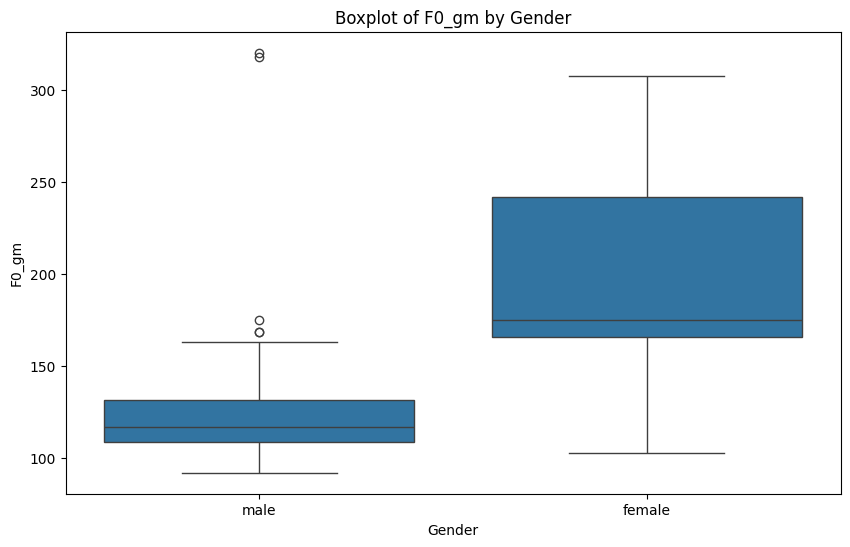

In [11]:

# Boxplot of F0_gm by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='F0_gm', data=df)
plt.title('Boxplot of F0_gm by Gender')
plt.xlabel('Gender')
plt.ylabel('F0_gm')
plt.show()


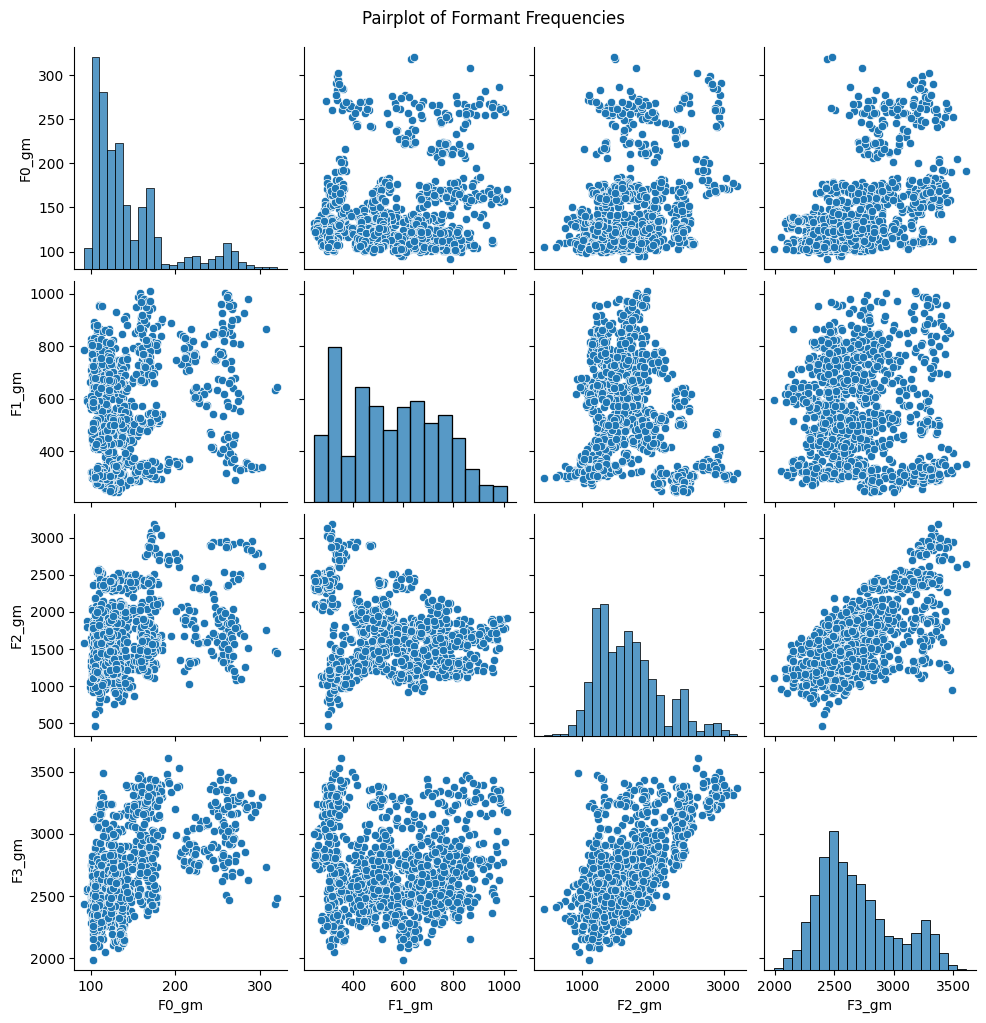

In [12]:

# Pairplot of formant frequencies
sns.pairplot(df[['F0_gm', 'F1_gm', 'F2_gm', 'F3_gm']])
plt.suptitle('Pairplot of Formant Frequencies', y=1.02)
plt.show()


In [ ]:
import pandas as pd

# Step 2: Read the CSV file into a DataFrame
file_path = r'd:/University of Rochester/Fall24/RA - Florian/Code/Experiment-NORM-AB-after-exclusions.csv'
df = pd.read_csv(file_path)

# Step 3: Inspect the DataFrame to understand its structure
# print(df.head())

# Step 4: Calculate the required statistics
# Assuming the DataFrame has columns 'Talker', 'Vowel', and 'Token'

# Number of unique talkers
num_talkers = df['Talker'].nunique()

# Number of unique vowels
num_vowels = df['Vowel'].nunique()

# Total number of tokens
num_tokens = df.shape[0]

# Provide a brief description
description = f"The database contains {num_talkers} unique talkers, {num_vowels} unique vowels, and a total of {num_tokens} tokens."
print(description)

  Talker Vowel  Token  Trial  Duration          SR Gender       F0_gm  \
0     E1   aa1      1      7  0.258644  150.345349   male  111.331160   
1     E1   aa1      2     17  0.224653  150.345349   male  110.190060   
2     E1   aa1      3     27  0.233428  150.345349   male  112.078218   
3     E1   aa1      4     37  0.266485  150.345349   male  106.249087   
4     E1   aa1      5     47  0.238694  150.345349   male  107.904260   

        F1_gm        F2_gm        F3_gm  height_gm  backness_gm  
0  598.114317  1133.572357  2227.575804   1.380847     0.639347  
1  554.648505  1226.774620  2326.718404   1.305400     0.793809  
2  582.161551  1133.536933  2180.602647   1.353813     0.666350  
3  618.666624  1163.534539  2223.333105   1.414632     0.631651  
4  651.237090  1132.643892  2256.831653   1.465939     0.553436  
The database contains 17 unique talkers, 8 unique vowels, and a total of 11 tokens.


In [8]:
# RANDOM ANALYSIS

df_perceptual = pd.read_csv(r"D:\University of Rochester\Fall24\RA - Florian\Code\Experiment-NORM-AB-after-exclusions.csv")
df_perceptual.head()
print(f"Num participants {len(df_perceptual['ParticipantID'].unique())}")
# print(f"Num males {df_perceptual[]}")
# Select relevant columns and remove duplicate entries to get unique participants
unique_participants = df_perceptual[['ParticipantID', 'Participant.Sex']].drop_duplicates()

# Standardize the 'Participant.Sex' entries to ensure consistency (e.g., capitalize first letter)
unique_participants['Participant.Sex'] = unique_participants['Participant.Sex'].str.capitalize()

# Count the number of males
male_count = unique_participants[unique_participants['Participant.Sex'] == 'Male']['ParticipantID'].nunique()

# Count the number of females
female_count = unique_participants[unique_participants['Participant.Sex'] == 'Female']['ParticipantID'].nunique()

# Print the counts
print(f"Number of Male Participants: {male_count}")
print(f"Number of Female Participants: {female_count}")

Num participants 31
Number of Male Participants: 24
Number of Female Participants: 20


C:\Users\Abhishek Sharma\AppData\Local\Temp\ipykernel_21752\3988062565.py:3: DtypeWarning: Columns (13,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_perceptual = pd.read_csv(r"D:\University of Rochester\Fall24\RA - Florian\Code\Experiment-NORM-AB-after-exclusions.csv")


In [9]:
df_perceptual.shape

(12953, 135)